In [1]:
! pip install torchtext==0.17.0 portalocker==2.8.2 lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.

# Assignment 3

In this assignment, you are to experiment with embedding vectors of words and training of a recurrent neural network for sentence classification.

## 1. Loading dataset

The dataset comes from https://www.kaggle.com/datasets/amananandrai/ag-news-classification-dataset

It contains 120,000 news articles that are labeled into four categories:

- 1: world news
- 2: sports
- 3: business
- 4: science and technology

In [2]:
# [THIS IS READ-ONLY]
import torchtext.datasets
import pandas as pd

train_iter = torchtext.datasets.AG_NEWS(root='/home/jovyan/public/datasets/', split='train')

train_df = pd.DataFrame(
    data=list(iter(train_iter)),
    columns=['target', 'news'],
)

print("Five randomly selected samples:")
print(train_df.sample(5, random_state=0))

Five randomly selected samples:
        target                                               news
40739        4  First class to the moon London - British airli...
105532       4  Amazon #39;s Holiday Pi Leave it to Amazon.com...
45004        4  Will historic flight launch space tourism? Reg...
71894        1  Thais Drop Peace Bombs On Muslims (CBS) Millio...
11970        3  U.S. Economy Grows at Slower Pace Than Expecte...


## 2. Tokenizer

🚨 Instruction:
> Load the `basic_english` tokenizer using the `get_tokenizer` from `torchtext.data`.

In [3]:
# [THIS IS READ-ONLY]
import torchtext.data

In [4]:
# [YOUR WORK HERE]
# @workUnit
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer("basic_english")

In [5]:
# [THIS IS READ-ONLY]
# @check
# @title: tokenizer

type(tokenizer), tokenizer.__qualname__

(function, '_basic_english_normalize')

In [6]:
# [THIS IS READ-ONLY]
# @check
# @title: tokens of sentence
tokenizer("This is assignment 3 for csci 4050u.  It's on sequence learning.")

['this',
 'is',
 'assignment',
 '3',
 'for',
 'csci',
 '4050u',
 '.',
 'it',
 "'",
 's',
 'on',
 'sequence',
 'learning',
 '.']

## 3. Vocabulary

Token sequence is a list of tokens.  We need to vocabulary to convert each
token into an integer, known as the token index.

In [7]:
# [THIS IS READ-ONLY]
# construct token sequence
# this is a collection of token sequences.
# Every sentence is converted to a token sequence by the tokenizer.

token_seq = map(tokenizer, train_df['news'])

🚨 Instruction:

> Use the `build_vocab_from_iterator` helper function from `torchtext.vocab` to construct
the vocabulary from the `token_seq`.

> Make sure you set the `min_freq=5` and special tokens should be `['<unk>', '<s>']`.
The first token index `0` corresponds to unknown token `<unk>`.

In [8]:
# [THIS IS READ-ONLY]
import torchtext.vocab

In [9]:
# [YOUR WORK HERE]
# @workUnit
from torchtext.vocab import build_vocab_from_iterator


vocab = vocab = build_vocab_from_iterator(
    token_seq,  # token_seq is the iterator over tokenized sentences
    min_freq=5,  # Minimum frequency for tokens to be included in the vocabulary
    specials=['<unk>', '<s>']  # Special tokens: <unk> for unknown and <s> for sentence start
)

In [10]:
# [THIS IS READ-ONLY]
# if token is not in vocabulary, use the index 0.
vocab.set_default_index(0)

In [11]:
# [THIS IS READ-ONLY]
# @check
# @title: length of the vocab

len(vocab)

30333

In [12]:
# [THIS IS READ-ONLY]
# @check
# @title: lookup token indexes using vocab

vocab.lookup_indices(tokenizer("this is an assignment for csci 4050u."))

[53, 22, 31, 10659, 12, 0, 0, 2]

In [13]:
# [THIS IS READ-ONLY]
# @check
# @title: lookup token string value using vocab

vocab.lookup_tokens([53, 22, 31, 10659, 12, 0, 0, 2])

['this', 'is', 'an', 'assignment', 'for', '<unk>', '<unk>', '.']

## 4. Integer encoding

Now, we are ready to encode news article sentences into sequences of integers.

🚨 Instruction:

> create a list of `torch.int64` tensors.  Each of the tensor is a vector of int64 integers which are the token indexes of the tokens of sentences in the
> training data.

In [14]:
# [THIS IS READ-ONLY]
import torch

In [15]:
# [YOUR WORK HERE]
# @workUnit

index_sequences = [
    torch.tensor(vocab.lookup_indices(tokenizer(review)), dtype=torch.int64)
    for review in train_df['news']
]

In [16]:
# [THIS IS READ-ONLY]
# @check
# @title: return types

print(f"Type of index_sequences: {type(index_sequences)}")
print(f"Type of elements in index_sequences: {type(index_sequences[0])} with dtype {index_sequences[0].dtype}")

Type of index_sequences: <class 'list'>
Type of elements in index_sequences: <class 'torch.Tensor'> with dtype torch.int64


In [17]:
# [THIS IS READ-ONLY]
# @check
# @title: number of index sequences

len(index_sequences)

120000

In [18]:
# [THIS IS READ-ONLY]
# @check
# @title: first three index sequences

for i in range(3):
    sentence = train_df.iloc[i].news
    index_sequence = index_sequences[i]
    print(sentence)
    print(index_sequence)

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.
tensor([  432,   426,     2,  1606, 14839,   114,    67,     3,   849,    14,
           28,    15,    28,    16,     0,     4,   432,   375,    17,    10,
            0,     7,     0,     4,    43,  4010,   784,   326,     2])
Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.
tensor([15875,  1073,   855,  1311,  4251,    14,    28,    15,    28,    16,
          930,   798,   321, 15875,    99,     4, 27658,    29,     6,  4460,
           12,   565,     0,     9,     0,  2126,     8,     3,   526,   242,
            4,    29,  3891,     0,  6575,    11,   207,   360,     7,     3,
          127,     2])
Oil and Economy Cloud Sto

## 5. Prepare token index tensor

Now, we are ready to prepare the training and validation data.

In [19]:
# [THIS IS READ-ONLY]
from torch.nn.utils.rnn import pad_sequence

- First we will need to pad each sequence in index_sequences so
they are all match the *longest* sequence.

- Then, we wil truncate each sequence to keep only the first 100 tokens.
  This is to remove the noise of the few extra long articles.  Basically,
  we will classify the article using only the first 100 tokens.

In [20]:
# [THIS IS READ-ONLY]
padded_sequences = pad_sequence(index_sequences, batch_first=True)
print("After padding:", padded_sequences.shape)

padded_sequences = padded_sequences[:, :100]
print("After truncation:", padded_sequences.shape)

After padding: torch.Size([120000, 207])
After truncation: torch.Size([120000, 100])


## 6. Prepare training and validation tensors

We can now prepare training and validation datasets for RNN training.

In [21]:
# [THIS IS READ-ONLY]
from torch.utils.data import (
    TensorDataset,
    random_split,
)

In [22]:
# [THIS IS READ-ONLY]
#
# targets
#

targets = torch.tensor(train_df['target'] - 1, dtype=torch.int64)
targets.shape

torch.Size([120000])

🚨 Instructions:

- Create the dataset from `padded_sequences` and `targets` using `TensorData`
- Create training and validation dataset using `random_split`.  Use 30% of the dataset for validation.

In [23]:
# [YOUR WORK HERE]
# @workUnit

# IMPORTANT: keep this line to pass the checkpoints.
torch.manual_seed(0)

#
# dataset for training and validation
#

dataset = TensorDataset(padded_sequences, targets)

train_size = int(0.7 * len(dataset))
val_size = len(dataset) - train_size

(train_dataset, val_dataset) = random_split(dataset, [train_size, val_size])

In [24]:
# [THIS IS READ-ONLY]
# @check
# @title: training and validation dataset sizes

len(train_dataset), len(val_dataset)

(84000, 36000)

In [25]:
# [THIS IS READ-ONLY]
# @check
# @title: training sample

print("Training sample:")
print(train_dataset[0])

Training sample:
(tensor([  237,  1491,   155,    12,   314,   222,   237,    29,  1074,    23,
         5051,   155,     5,  1251,     3,  3763,   754,     4,  3674,     6,
          222,     7, 12848,   533,     0,     2,   227,   170, 13340, 19751,
           27,    11,    66,     3,   151,    96,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0]), tensor(1))


In [26]:
# [THIS IS READ-ONLY]
# @check
# @title: validation sample

print("Validation sample:")
print(val_dataset[0])

Validation sample:
(tensor([ 817, 3090,    8, 2670,   12, 6648,  200,  126,  282, 1250, 2097,   51,
         430,   30,  596,  985,    9,    3, 2117,   97,   12,    3, 4081, 5836,
         366, 2661,   14, 6648,   15,  430,   13,  531,    2,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0]), tensor(0))


# INSTRUCTION

## 📢 For the remainder of the worksheet, you must understand the code provided.  But no workUnits are required.

## 🚨 You must execute all cells and obtain the performance comparison plots.

## 7. Simple RNN Module

In [27]:
# [THIS IS READ-ONLY]
import torch.nn as nn
from lightning.pytorch import LightningModule
from torchmetrics import Accuracy

vocab_size = len(vocab)
num_layers = 1
num_classes = 4

class MyRNN(nn.Module):
    def __init__(self, d_emb, d_state):
        super().__init__()
        self.emb = nn.Embedding(vocab_size, d_emb)
        self.rnn = nn.RNN(
            input_size=d_emb,
            hidden_size=d_state,
            num_layers=num_layers,
            batch_first=True,
        )
        self.output = nn.Linear(d_state, num_classes)
        self.accuracy = Accuracy(task='multiclass', num_classes=num_classes)

    def forward(self, batch_of_sequences):
        embeddings = self.emb(batch_of_sequences)
        _, final_states = self.rnn(embeddings)
        final_state = final_states[-1]
        logits = self.output(final_state)
        return logits

Let's try out the basic RNN (not yet trained) on a sample batch.

In [28]:
# [THIS IS READ-ONLY]
# @check
# @title: untrained model checking

model = MyRNN(d_emb=128, d_state=64)
model

MyRNN(
  (emb): Embedding(30333, 128)
  (rnn): RNN(128, 64, batch_first=True)
  (output): Linear(in_features=64, out_features=4, bias=True)
  (accuracy): MulticlassAccuracy()
)

In [29]:
# [THIS IS READ-ONLY]
# @check
# @title: untrained model checking

model = MyRNN(d_emb=128, d_state=64)
x, target = dataset[:32]
model(x).shape

torch.Size([32, 4])

## 8. Simple RNN Lightning Module

Add the Lightning logging methods to `MyRNN`.

In [30]:
# [THIS IS READ-ONLY]
class MyLightning(LightningModule):
    def training_step(self, batch_of_sequences):
        x, target = batch_of_sequences
        y = self.forward(x)
        loss = nn.functional.cross_entropy(y, target)
        self.accuracy(y, target)
        self.log('accuracy', self.accuracy, prog_bar=True)
        self.log('loss', loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters())

    def validation_step(self, batch, batch_index):
        x, target = batch
        y = self.forward(x)
        self.accuracy(y, target)
        self.log('val_acc', self.accuracy, prog_bar=True)

In [31]:
# [THIS IS READ-ONLY]
class MyLightningRNN(MyRNN, MyLightning):
    pass

## 9. Create a trainer utility

In [32]:
# [THIS IS READ-ONLY]
from lightning.pytorch import Trainer
from lightning.pytorch.loggers import CSVLogger
from lightning.pytorch.callbacks import ModelCheckpoint
from lightning import seed_everything
from torch.utils.data import DataLoader
import shutil, os
import time

#
# initialize logger
#

batch_size = 32
train_dataloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size)
val_dataloader = DataLoader(val_dataset, shuffle=False, batch_size=batch_size)

def train(*, name:str, model:LightningModule, epochs:int, debug=True):
    # reset the random generator
    seed_everything(0)

    # create CSV logger
    logger = CSVLogger('./lightning_logs/', name)

    # create trainer
    trainer = Trainer(
        logger = logger,
        max_epochs = epochs,
        max_steps = 100 if debug else -1
    )

    try:
        shutil.rmtree(f"./lightning_logs/{name}")
        os.mkdirs(f"./lightning_logs/{name}")
    except:
        pass

    # start trainer
    start = time.time()
    trainer.fit(
            model=model,
            train_dataloaders=train_dataloader,
            val_dataloaders=val_dataloader
    )
    duration = (time.time() - start)
    print(f"Completed {epochs} epochs in {duration:0.2f} seconds.")
    print(trainer.validate(model, dataloaders = val_dataloader))

## 10. Train some RNN

📢 Instruction

- You are encouraged to play with the parameters:

> - `d_emb`
> - `d_state`
> - `epochs`

📢 Note:

- For `d_emb=8, d_state=16`, it takes 50 seconds per epoch.

In [33]:
# [YOUR WORK HERE]
# @workUnit

seed_everything(0)

train(
    name='rnn',
    model = MyLightningRNN(d_emb=8, d_state=16),
    epochs=5,
    debug=False,
)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0
INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name     | Type               | Params | Mode 
--------------------------------------------------------
0 | emb      | Embedding          | 242 K  | train
1 | rnn      | RNN                | 416    | train
2 | output   | Linear             | 68     | train
3 | accuracy | MulticlassAccuracy | 0      | train
-----------------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Completed 5 epochs in 115.48 seconds.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.24738888442516327    │
└───────────────────────────┴───────────────────────────┘

[{'val_acc': 0.24738888442516327}]


We will now enhance the RNN classifier with a more advanced architecture for the cell -- namely the LSTM design.

### Extending RNN to LSTM

In [34]:
# [THIS IS READ-ONLY]
class MyLSTM(nn.Module):
    def __init__(self, d_emb, d_state):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, d_emb)

        self.lstm = nn.LSTM(input_size=d_emb,
                          hidden_size=d_state,
                          num_layers=1,
                          batch_first=True)

        self.output = nn.Linear(d_state, num_classes)

        # will be monitoring accuracy
        self.accuracy = Accuracy(task='multiclass', num_classes=num_classes)

    def forward(self, x):
        x = self.embedding(x)
        _, (states, _) = self.lstm(x)
        states = states[-1]
        return self.output(states)

In [35]:
# [THIS IS READ-ONLY]
class MyLightningLSTM(MyLSTM, MyLightning):
    pass

📢 Instruction

- You are encouraged to play with the parameters:

> - `d_emb`
> - `d_state`
> - `epochs`

📢 Note:

- For `d_emb=8, d_state=16`, it takes 30 seconds per epoch.

In [36]:
# [YOUR WORK HERE]
# @workUnit

seed_everything(0)

train(
    name = 'lstm',
    model = MyLightningLSTM(d_emb=8, d_state=16),
    epochs = 5,
    debug = False,
)

INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0
INFO: Seed set to 0
INFO:lightning.fabric.utilities.seed:Seed set to 0
INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name      | Type               | Params | Mode 
---------------------------------------------------------
0 | embedding | Embedding          | 242 K  | train
1 | lstm      | LSTM               | 1.7 K  | train
2 | output    | Linear             | 68     | train
3 | accuracy  | MulticlassAccuracy | 0      | train
-----------------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO: `Trainer.fit` stopped: `max_epochs=5` reached.
INFO:lightning.pytorch.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Completed 5 epochs in 112.28 seconds.


Validation: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.6263889074325562     │
└───────────────────────────┴───────────────────────────┘

[{'val_acc': 0.6263889074325562}]


## 11. Performance comparison

- Lightning logs the performance metrics in `./lightning_logs/{name}/{version}/metrics.csv`.
- We can load the metrics into pandas dataframes and plot the validation accuracy over runs.

In [37]:
# [THIS IS READ-ONLY]
perf_rnn = pd.read_csv('./lightning_logs/rnn/version_0/metrics.csv')
perf_lstm = pd.read_csv('./lightning_logs/lstm/version_0/metrics.csv')
val_acc = pd.concat([perf_rnn.val_acc.dropna(), perf_lstm.val_acc.dropna()], axis=1)
val_acc.columns = ['rnn', 'lstm']
val_acc

,rnn,lstm
52,0.249892,0.250075
106,0.249575,0.251458
159,0.249025,0.249733
213,0.252333,0.422842
266,0.249783,0.591092
267,0.247389,0.626389


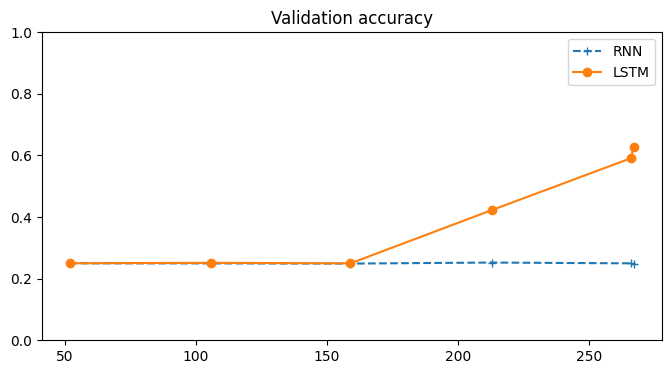

In [46]:
# [THIS IS READ-ONLY]
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(val_acc.index, val_acc.rnn, '--+', val_acc.index, val_acc.lstm, '-o')
plt.ylim(0, 1)
plt.title('Validation accuracy')
plt.legend(['RNN', 'LSTM'])
plt.show();

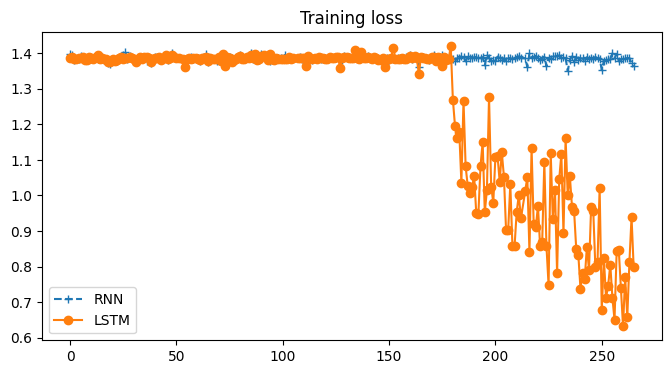

In [47]:
# [THIS IS READ-ONLY]
loss = pd.concat([perf_rnn.loss.dropna(), perf_lstm.loss.dropna()], axis=1)
loss.columns = ['rnn', 'lstm']

plt.figure(figsize=(8, 4))
plt.plot(loss.index, loss.rnn, '--+', loss.index, loss.lstm, '-o')
plt.title('Training loss')
plt.legend(['RNN', 'LSTM'])
plt.show();